In [1]:
import pandas as pd

train_data = pd.read_csv("data/train.csv")

In [2]:
test_data = pd.read_csv("./data/test.csv")
# embeddings = "./data/GoogleNews-vectors-negative300.bin.gz"

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [7]:
stops = set(stopwords.words('english'))

In [8]:
import re

### Clean up the data by removing redundant characters and punctuations

In [9]:
SPECIAL_TOKENS = {
    'quoted': 'quoted_item',
    'non-ascii': 'non_ascii_word',
    'undefined': 'something'
}

def clean(text):
    import re
    from string import punctuation
    from nltk.stem import SnowballStemmer
    from nltk.corpus import stopwords
    
    def pad_str(s):
        return ' '+s+' '
    
    if pd.isnull(text):
        return ''

#    stops = set(stopwords.words("english"))
    # Clean the text, with the option to stem words.
    
    # Empty question
    
    if type(text) != str or text=='':
        return ''

    # Clean the text
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE)
    text = re.sub("\'ve", " have ", text)
    text = re.sub("can't", "can not", text)
    text = re.sub("n't", " not ", text)
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE)
    text = re.sub("\'re", " are ", text)
    text = re.sub("\'d", " would ", text)
    text = re.sub("\'ll", " will ", text)
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE)
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE)
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text)
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)
    
    # remove comma between numbers, i.e. 15,000 -> 15000
    
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)
    
#     # all numbers should separate from words, this is too aggressive
    
#     def pad_number(pattern):
#         matched_string = pattern.group(0)
#         return pad_str(matched_string)
#     text = re.sub('[0-9]+', pad_number, text)
    
    # add padding to punctuations and special chars, we still need them later
    
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)
    
#    def pad_pattern(pattern):
#        matched_string = pattern.group(0)
#       return pad_str(matched_string)
#    text = re.sub('[\!\?\@\^\+\*\/\,\~\|\`\=\:\;\.\#\\\]', pad_pattern, text) 
        
    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text) # replace non-ascii word with special word
    
    # indian dollar
    
    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)
    
    # clean text rules get from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text) 
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)  
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE) 
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE) 
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)
    
    # replace the float numbers with a random number, it will be parsed as number afterward, and also been replaced with word "number"
    
    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)
  
    
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation]).lower()
       # Return a list of words
    return text

In [10]:
train_data['question1'] = train_data['question1'].apply(clean)
train_data['question2'] = train_data['question2'].apply(clean)
test_data['question1'] = test_data['question1'].apply(clean)
test_data['question2'] = test_data['question2'].apply(clean)

### Using stemmer to pick appropriate features only

In [11]:
def stem_and_clean(quest):
    q_tokens = word_tokenize(quest)
    q_tokens = [word for word in q_tokens if word not in stops]
    q_snowball = [stemmer.stem(token) for token in q_tokens]
    return q_snowball

In [12]:
train_data['question1_snowball'] = train_data['question1'].apply(stem_and_clean)
train_data['question2_snowball'] = train_data['question2'].apply(stem_and_clean)
test_data['question1_snowball'] = test_data['question1'].apply(stem_and_clean)
test_data['question2_snowball'] = test_data['question2'].apply(stem_and_clean)

#### Building generic features to get percentage matching words, length and stop words related features

In [14]:
def perc_matching_words(q1_snowball, q2_snowball):
    common = set(q1_snowball).intersection( set(q2_snowball) )
    unique = set(q1_snowball).union( set(q2_snowball) )
    common_percent = 0.00
    if(len(unique) > 0):
        common_percent = len(common)/(len(unique))
    return round(common_percent,2)

In [15]:
def get_len_questions(q1_snowball, q2_snowball):
    ratio = 0.00
    q1_len = len(q1_snowball)
    q2_len = len(q2_snowball)
    if q2_len > 0:
        ratio = q1_len/q2_len
    return round(ratio,2)

In [16]:
def get_num_stop_words(quest1, quest2):
    q1_tokens = word_tokenize(quest1.lower())
    q2_tokens = word_tokenize(quest2.lower())
    q1_tokens = [word for word in q1_tokens if word in stops]
    q2_tokens = [word for word in q2_tokens if word in stops]
    ratio = 0.00
    q1_len = len(q1_tokens)
    q2_len = len(q2_tokens)    
    if q2_len > 0:
        ratio = q1_len/q2_len
    return round(ratio,2)

### Extracting distance based features

In [17]:
import textdistance

In [18]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_snowball,question2_snowball
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]"
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoo..."
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]"
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]"
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,"[one, dissolv, water, quik, sugar, salt, metha...","[fish, would, surviv, salt, water]"


In [ ]:
for dataset in [train_data,test_data]:
    dataset['hamming'] = dataset.apply(lambda row: textdistance.hamming.distance(str(row['question1']), str(row['question2'])), axis=1)
    dataset['mlipns'] = dataset.apply(lambda row: textdistance.mlipns.distance(str(row['question1']), str(row['question2'])), axis=1)
    dataset['damerau_levenshtein'] = dataset.apply(lambda row: textdistance.damerau_levenshtein.distance(str(row['question1']), str(row['question2'])), axis=1)
    dataset['jaro_winkler'] = dataset.apply(lambda row: textdistance.jaro_winkler.distance(str(row['question1']), str(row['question2'])), axis=1)
    dataset['jaccard'] = dataset.apply(lambda row: textdistance.jaccard.distance(str(row['question1']), str(row['question2'])), axis=1)
    dataset['cosine'] = dataset.apply(lambda row: textdistance.cosine.distance(str(row['question1']), str(row['question2'])), axis=1)
    dataset['word_match'] = dataset.apply(lambda row: perc_matching_words(str(row['question1_snowball']), str(row['question2_snowball'])), axis=1)
    dataset['len_match'] = dataset.apply(lambda row: get_len_questions(str(row['question1_snowball']), str(row['question2_snowball'])), axis=1)
    dataset['stop_match'] = dataset.apply(lambda row: get_num_stop_words(str(row['question1']), str(row['question2'])), axis=1)

### Visualizing distance based features

In [20]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_snowball,question2_snowball,hamming,mlipns,damerau_levenshtein,jaro_winkler,jaccard,cosine,word_match,len_match,stop_match
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",9,0,9,0.027692,0.138462,0.071809,1.00,1.17,1.17
1,1,3,4,what is the story of kohinoor kohinoor diamond,what would happen if the indian government sto...,0,"[stori, kohinoor, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoo...",75,1,42,0.168581,0.482353,0.287910,0.64,0.48,1.00
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dns]",60,1,38,0.164697,0.375000,0.226269,0.75,1.21,1.60
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math2324math is divide...,0,"[mental, lone, solv]","[find, remaind, math2324math, divid, 2423]",52,1,43,0.406755,0.549296,0.377201,0.50,0.50,2.00
4,4,9,10,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water,0,"[one, dissolv, water, quik, sugar, salt, metha...","[fish, would, surviv, salt, water]",66,1,50,0.340621,0.539474,0.335470,0.67,1.95,1.50


So we have distance based features now and also some NLP based features. Lets combine them with the TF-IDF based matrix and try to train a XG Boost based classifier.

## Combined model using NLP + TF-IDF vectorizer + XGBoost

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(pd.concat((train_data['question1'],train_data['question2'])).unique())
trainq1_trans = tfidf_vect.transform(train_data['question1'].values)
trainq2_trans = tfidf_vect.transform(train_data['question2'].values)

In [26]:
labels = train_data['is_duplicate'].values

In [27]:
import scipy

In [28]:
X = scipy.sparse.hstack((trainq1_trans,trainq2_trans,train_data[['hamming','mlipns','damerau_levenshtein','jaro_winkler','jaccard','cosine','word_match','len_match','stop_match']]))

In [29]:
X.shape

(404290, 10009)

So We have combined **tfidf matrix with distance metrics**. We can now split the data and build the model.

In [30]:
y = labels

In [31]:
y.shape

(404290,)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size = 0.20, random_state = 42)

In [37]:
from xgboost import XGBClassifier

In [40]:
xgb_model = XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8, n_jobs=-1) 

In [41]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eta=0.3, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
       n_estimators=80, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=4,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8)

In [44]:
Y_t_pred = xgb_model.predict_proba(X_train)
Y_v_pred = xgb_model.predict_proba(X_valid)

In [46]:
Y_t_pred.shape

(323432, 2)

In [51]:
Y_t_pred_out = Y_t_pred[:,1]
Y_v_pred_out = Y_v_pred[:,1]

### AUC-ROC Curve

In [52]:
import numpy as np

Area under the ROC curve : 0.898956


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[]

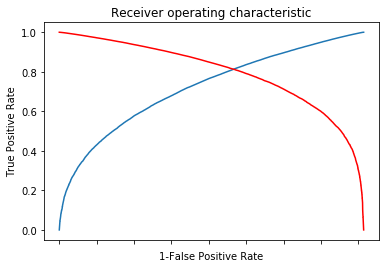

In [53]:
from sklearn.metrics import roc_curve, auc
import pylab as pl

fpr, tpr, thresholds =roc_curve(y_valid, Y_v_pred_out)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

####################################
# The optimal cut off would be where tpr is high and fpr is low
# tpr - (1-fpr) is zero or near to zero is the optimal cut off point
####################################
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr
fig, ax = pl.subplots()
pl.plot(roc['tpr'])
pl.plot(roc['1-fpr'], color = 'red')
pl.xlabel('1-False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')
ax.set_xticklabels([])

### Loss On Training Data

In [54]:
from sklearn.metrics import log_loss

In [55]:
print("Loss on training data", log_loss(y_train,Y_t_pred))

Loss on training data 0.20913983339724226


### Loss on validation data

In [56]:
print("Loss on validation data", log_loss(y_valid,Y_v_pred))

Loss on validation data 0.3857814382194257
